In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [122]:
#experimental data

#CST concentrations used in inhibition assays, data set 2
cCST_ds2 = np.array([0.1,1.,2.5,5.,7.5,10.,15.,20.,25.,50.,100.,200.,300.,400.,500.])*3

#fraction Telomerase bound to DNA, data set 2 
fb_5ac = [1,1.01,1.04,0.95,0.89,0.77,0.66,0.62,0.63,0.46,0.17,0.19,0.14,0.11,0.08]
fb_25ac = [1.,1.02,1.09,1.07,1.17,0.94,1.01,0.97,0.91,0.77,0.5,0.33,0.27,0.23,0.18]
fb_25ac_g2 = [1.,1.02,1.11,1.07,1.17,0.94,1.,1.03,0.98,0.86,0.57,0.38,0.3,0.25,0.19]
fb_100ac = [1,1.03,0.87,1.,0.89,0.94,0.99,0.92,0.89,0.78,0.66,0.52,0.42,0.42,0.33]


#CST concentrations used in inhibition assays, data set 1
cCST_ds1 = np.array([0.0,5.,10.,25.,50.,100.,200.,300.,400.,500.])*3


#fraction Telomerase bound to DNA, data set 1 
fb_dna10_A = np.array([1.,0.88,0.84,0.74,0.57,0.38,0.27,0.18,0.18,0.14])
fb_dna10_B = np.array([1.,0.82,0.76,0.7,0.6,0.38,0.28,0.18,0.18,0.13])
fb_dna50_B = np.array([1.,1.08,1.14,1.07,0.95,0.58,.58,0.5,0.35,0.32])
fb_dna100_A = np.array([1.,1.02,1.06,1.01,1.04,0.94,0.7,0.67,0.53,0.45])
fb_dna100_B = np.array([1.,1.18,1.11,1.08,1.02,0.98,0.73,0.66,0.54,0.47])
fb_dna200_A = np.array([1.,1.07,1.04,1.03,1.07,1.04,0.91,0.86,0.74,0.65])


In [123]:
#define exact Competitve Binding Equation

def eq4(cCST=cCST,cDNA=cDNA,gamma=gamma,Kd1=Kd1,Kd2=Kd2,ctel=ctel): 
# inputs: np.array of CST concentrations, DNA concentration, Telomerase concentration, 
# Kds for Tel.DNA and CST.DNA
# outputs: normalized fraction bound (Tel.DNA)
    
    cCST = gamma*cCST
    
    a = np.array(Kd1 + Kd2 + cCST + ctel - cDNA)
    b = np.array(Kd2*(cCST-cDNA) + Kd1*(ctel-cDNA) + Kd1*Kd2)
    c = -Kd1*Kd2*cDNA
    theta = np.arccos( ((-2.0*a**3)+9*a*b-27*c)/(2*np.sqrt( (a**2-3*b)**3)) )


    ctel_cDNA = (ctel*(2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a))/(3*Kd2+2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a) #nM
    cCST_DNA = (cCST*(2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a))/(3*Kd1+2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a)  #nM
    cDNA_free = -(a/3) + (2/3)*np.sqrt(a**2-3*b)*np.cos(theta/3)   #nM

    eq4_fractionbound_1 = ctel_cDNA/cDNA
    eq4_fractionbound_n_1 = eq4_fractionbound_1/np.max(eq4_fractionbound_1)
    
    cCST = cCST/gamma
    
    
    return eq4_fractionbound_n_1

In [124]:
# Calculate Residual Sum of Squares for data


#define array of gamma values 
gamma_list = np.linspace(0.001,2.0,100).tolist()

#define array of Kd Tel-DNA values
Kd_tel_DNA = np.linspace(0.001,4.,100).tolist()


def sumofsquares(exact,exp):
    squared_diff = (exp-exact)**2
    sums = np.sum(squared_diff)
    return sums


def error_space(gamma_list=gamma_list,Kd_tel_DNA=Kd_tel_DNA):
    size = len(gamma_list)
    RSS = []
    for i in gamma_list:
        
        for j in Kd_tel_DNA:
            
            #exact, ds 2
            ex_cDNA5 = eq4(cCST=cCST_ds2,cDNA=5.,gamma=i,Kd2=j)
            ex_cDNA25 = eq4(cCST=cCST_ds2,cDNA=25.,gamma=i,Kd2=j)
            ex_cDNA100 = eq4(cCST=cCST_ds2,cDNA=100.,gamma=i,Kd2=j)
            
            #error, ds 2 
            error_dna5ac = sumofsquares(ex_cDNA5,fb_5ac)
            error_dna25ac = sumofsquares(ex_cDNA25,fb_25ac)
            error_dna25ac_g2 = sumofsquares(ex_cDNA25,fb_25ac_g2)
            error_dna100ac = sumofsquares(ex_cDNA100,fb_100ac)
            
            
            
            #exact, ds1
            ex_cDNA10_O = eq4(cCST=cCST_ds1,cDNA=10.,gamma=i,Kd2=j)
            ex_cDNA50_O = eq4(cCST=cCST_ds1,cDNA=50.,gamma=i,Kd2=j)
            ex_cDNA100_O = eq4(cCST=cCST_ds1,cDNA=100.,gamma=i,Kd2=j)
            ex_cDNA200_O = eq4(cCST=cCST_ds1,cDNA=200.,gamma=i,Kd2=j)
        

            #error, ds1
            error_dna50_A = sumofsquares(ex_cDNA50_O,fb_dna50_B)
            error_dna10_A = sumofsquares(ex_cDNA10_O,fb_dna10_A)
            error_dna10_B = sumofsquares(ex_cDNA10_O,fb_dna10_B)
            error_dna100_A = sumofsquares(ex_cDNA100_O,fb_dna100_A)
            error_dna100_B = sumofsquares(ex_cDNA100_O,fb_dna100_B)
            error_dna200_A = sumofsquares(ex_cDNA200_O,fb_dna200_A)
   

            
            total_error_ds2 = error_dna25ac_g2 + error_dna5ac + error_dna25ac
            total_error_ds1 = error_dna50_A + error_dna10_A + error_dna10_B
            total_error_ds1 = total_error_ds1 + error_dna100_A + error_dna100_B + error_dna200_A
           
            
            total_error = total_error_ds1 + total_error_ds2
        
            
            RSS.append(total_error)
        
    RSS = np.array(RSS)
        
    return RSS.reshape(size,size)

In [125]:
#calculate Residual Sum Square of squares
RSS_y = error_space(gamma_list,Kd_tel_DNA)


# define optimized Kd Tel-DNA and gamma values (where RSS is at a minimum)
best_Kd2 = Kd_tel_DNA[np.where(RSS_y==np.min(RSS_y))[1][0]]
best_gamma = gamma_list[np.where(RSS_y==np.min(RSS_y))[0][0]]

# min and max of RSS values
minE = (np.min(RSS_y))
maxE = (np.max(RSS_y))

print('Optimized Kd Tel-DNA:',best_Kd2)
print('Optimized gamma:',best_gamma)

Optimized Kd Tel-DNA: 0.32415151515151513
Optimized gamma: 0.4654141414141414


In [126]:
# create range of CST concentrations for exact equation calculations
CST_initialcon = 1000000 #nM
cCST = []

for i in range(25):
        cCST.append(CST_initialcon/(2.0**i))

cCST = np.array(cCST)

cCST = cCST*3.
cCST = np.concatenate((cCST,cCST_ds2))
cCST = np.concatenate((cCST,cCST_ds1))
cCST = np.sort(cCST)
cCST = np.array(cCST)


#define experimental and calculated (exact) conditions 
cDNA = 10.0 #nM
ctel = 2. #nM 
Kd1 = 2.2 #nM - CST-DNA
Kd2 = best_Kd2 #nM - telomerase-DNA
gamma = best_gamma #activity coefficient

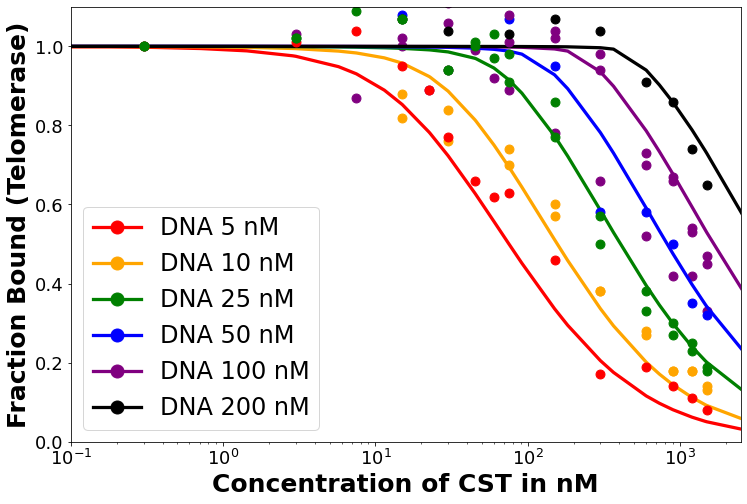

In [127]:
# Plot data with exact curves generated with optimized values

# plot details
xlow = 0.1
xhigh = 2500
ylow = 0.0
yhigh = 1.1
plt.figure(figsize=(12,8))
plt.rc('font', size=18) 
plt.ylim(ylow,yhigh)
plt.xlim(xlow,xhigh)
plt.xscale('log')
plt.xlabel('Concentration of CST in nM',fontsize = 25,  fontweight='bold')
plt.ylabel('Fraction Bound (Telomerase)',fontsize = 25,fontweight='bold')

# calculate exact curves with optimized values
eq4_fractionbound_dna5 = eq4(cCST=cCST,cDNA=5)
eq4_fractionbound_dna10 = eq4(cCST=cCST,cDNA=10)
eq4_fractionbound_dna25 = eq4(cCST=cCST,cDNA=25)
eq4_fractionbound_dna50 = eq4(cCST=cCST,cDNA=50)
eq4_fractionbound_dna100 = eq4(cCST=cCST,cDNA=100)
eq4_fractionbound_dna200 = eq4(cCST=cCST,cDNA=200)

# plot the curves
plt.plot(cCST,eq4_fractionbound_dna5,c='red',linewidth = 3.25,zorder=1)
plt.plot(cCST,eq4_fractionbound_dna10,c='orange',linewidth = 3.25,zorder=1)
plt.plot(cCST,eq4_fractionbound_dna25,c="green",linewidth = 3.25,zorder=1)
plt.plot(cCST,eq4_fractionbound_dna50,c="blue",linewidth = 3.25,zorder=1)
plt.plot(cCST,eq4_fractionbound_dna100,c="purple",linewidth = 3.25,zorder=1)
plt.plot(cCST,eq4_fractionbound_dna200,c="black",linewidth=3.25,zorder=1)



# plot experimental data
plt.scatter(cCST_ds1,fb_dna10_A,c='orange',s = 80,zorder=2)
plt.scatter(cCST_ds1,fb_dna10_B,c='orange',s = 80,zorder=2)
plt.scatter(cCST_ds1,fb_dna50_B,c='blue',s = 80,zorder=2)
plt.scatter(cCST_ds1,fb_dna100_A,c='purple',s = 80,zorder=2)
plt.scatter(cCST_ds1,fb_dna100_B,c='purple', s = 80,zorder=2)
plt.scatter(cCST_ds1,fb_dna200_A,c='black', s =80,zorder = 2)

plt.scatter(cCST_ds2,fb_100ac,c="purple", s = 80,zorder=1)
plt.scatter(cCST_ds2,fb_5ac,c="red", s = 80,zorder=2)
plt.scatter(cCST_ds2,fb_25ac,c="green", s =80,zorder=2)
plt.scatter(cCST_ds2,fb_25ac_g2,c="green", s = 80,zorder=2)


#nice legend figures! 
x = [1,2]
y = [100,200]

plt.plot(x,y,'-o',c='red',label = 'DNA 5 nM',linewidth=3.25,markersize = 13)
plt.plot(x,y,'-o',c='orange',label = 'DNA 10 nM',linewidth=3.25,markersize = 13)
plt.plot(x,y,'-o',c='green',label = 'DNA 25 nM',linewidth=3.25,markersize = 13)
plt.plot(x,y,'-o',c='blue',label = 'DNA 50 nM',linewidth=3.25,markersize = 13)
plt.plot(x,y,'-o',c='purple',label = 'DNA 100 nM',linewidth=3.25,markersize = 13)
plt.plot(x,y,'-o',c='black',label = 'DNA 200 nM',linewidth=3.25,markersize = 13)



plt.legend(prop={"size":24})

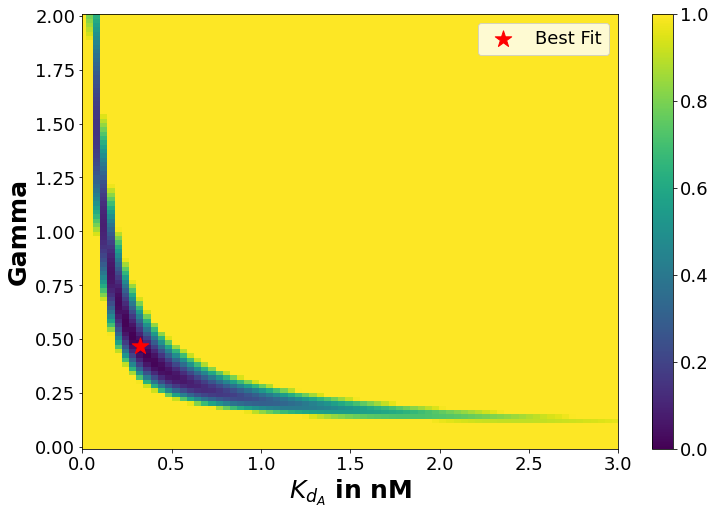

In [129]:
# Error Space Visulaization -- Banana plots

plt.figure(figsize=(12,8))
plt.pcolor(Kd_tel_DNA,gamma_list,RSS_y,vmin=(np.min(RSS_y)),vmax=2.0*(np.min(RSS_y)),shading='auto')
plt.xlabel('${K_{d_A}}$ in nM',fontsize=25,fontweight='bold')
plt.ylabel("Gamma",fontsize=25,fontweight='bold')
plt.xlim(0.0,3.0)
plt.scatter(best_Kd2,best_gamma,marker='*',c='red',s=300,label='Best Fit')
plt.colorbar()
plt.legend()